## NEURAL NETWORK

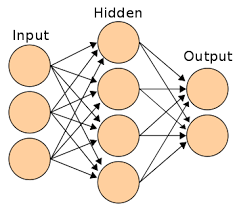

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
#loading the data
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
breast_cancer_dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
dataframe=pd.DataFrame(breast_cancer_dataset.data,columns=breast_cancer_dataset.feature_names)

In [5]:
dataframe

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
dataframe['label']=breast_cancer_dataset.target

In [7]:
dataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [8]:
dataframe.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [9]:
dataframe.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
dataframe.shape

(569, 31)

In [12]:
dataframe.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [13]:
dataframe['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

1 --> Benign

0 --> Malignant

In [14]:
dataframe.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [15]:
X=dataframe.drop(columns='label',axis=1)
Y=dataframe['label']

In [16]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [17]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32

In [18]:
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.25,random_state=2)

In [19]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
489,16.69,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.18,26.56,127.30,1084.0,0.10090,0.29200,0.247700,0.087370,0.4677,0.07623
194,14.86,23.21,100.40,671.4,0.10440,0.19800,0.169700,0.088780,0.1737,0.06672,...,16.08,27.78,118.60,784.7,0.13160,0.46480,0.458900,0.172700,0.3000,0.08701
188,11.81,17.39,75.27,428.9,0.10070,0.05562,0.023530,0.015530,0.1718,0.05780,...,12.57,26.48,79.57,489.5,0.13560,0.10000,0.088030,0.043060,0.3200,0.06576
285,12.58,18.40,79.83,489.0,0.08393,0.04216,0.001860,0.002924,0.1697,0.05855,...,13.50,23.08,85.56,564.1,0.10380,0.06624,0.005579,0.008772,0.2505,0.06431
362,12.76,18.84,81.87,496.6,0.09676,0.07952,0.026880,0.017810,0.1759,0.06183,...,13.75,25.99,87.82,579.7,0.12980,0.18390,0.125500,0.083120,0.2744,0.07238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,10.51,23.09,66.85,334.2,0.10150,0.06797,0.024950,0.018750,0.1695,0.06556,...,10.93,24.22,70.10,362.7,0.11430,0.08614,0.041580,0.031250,0.2227,0.06777
534,10.96,17.62,70.79,365.6,0.09687,0.09752,0.052630,0.027880,0.1619,0.06408,...,11.62,26.51,76.43,407.5,0.14280,0.25100,0.212300,0.098610,0.2289,0.08278
493,12.46,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.011490,0.1613,0.06013,...,13.19,16.36,83.24,534.0,0.09439,0.06477,0.016740,0.026800,0.2280,0.07028
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.029580,0.026470,0.1689,0.05808,...,13.61,19.27,87.22,564.9,0.12920,0.20740,0.179100,0.107000,0.3110,0.07592


In [20]:
Y_train

489    0
194    0
188    1
285    1
362    1
      ..
299    1
534    1
493    1
527    1
168    0
Name: label, Length: 426, dtype: int32

In [21]:
X_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
528,13.940,13.17,90.31,594.2,0.12480,0.09755,0.10100,0.066150,0.1976,0.06457,...,14.62,15.38,94.52,653.3,0.1394,0.1364,0.15590,0.10150,0.2160,0.07253
291,14.960,19.10,97.03,687.3,0.08992,0.09823,0.05940,0.048190,0.1879,0.05852,...,16.25,26.19,109.10,809.8,0.1313,0.3030,0.18040,0.14890,0.2962,0.08472
467,9.668,18.10,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.1680,0.06412,...,11.15,24.62,71.11,380.2,0.1388,0.1255,0.06409,0.02500,0.3057,0.07875
108,22.270,19.67,152.80,1509.0,0.13260,0.27680,0.42640,0.182300,0.2556,0.07039,...,28.40,28.01,206.80,2360.0,0.1701,0.6997,0.96080,0.29100,0.4055,0.09789
340,14.420,16.54,94.15,641.2,0.09751,0.11390,0.08007,0.042230,0.1912,0.06412,...,16.67,21.51,111.40,862.1,0.1294,0.3371,0.37550,0.14140,0.3053,0.08764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,13.530,10.94,87.91,559.2,0.12910,0.10470,0.06877,0.065560,0.2403,0.06641,...,14.08,12.49,91.36,605.5,0.1451,0.1379,0.08539,0.07407,0.2710,0.07191
322,12.860,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.034000,0.1543,0.06476,...,14.04,21.08,92.80,599.5,0.1547,0.2231,0.17910,0.11550,0.2382,0.08553
173,11.080,14.71,70.21,372.7,0.10060,0.05743,0.02363,0.025830,0.1566,0.06669,...,11.35,16.82,72.01,396.5,0.1216,0.0824,0.03938,0.04306,0.1902,0.07313
470,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.015140,0.2238,0.06413,...,11.14,25.62,70.88,385.2,0.1234,0.1542,0.12770,0.06560,0.3174,0.08524


In [22]:
Y_test

528    1
291    1
467    1
108    0
340    1
      ..
76     1
322    1
173    1
470    1
526    1
Name: label, Length: 143, dtype: int32

In [23]:
print(X.shape,X_train.shape,X_test.shape,Y.shape,Y_train.shape,Y_test.shape)

(569, 30) (426, 30) (143, 30) (569,) (426,) (143,)


In [24]:
scaler=StandardScaler()
scaler

StandardScaler()

In [25]:
xtrain_std=scaler.fit_transform(X_train)
xtrain_std

array([[ 0.75745491,  0.19700816,  0.65229915, ..., -0.3968803 ,
         2.96709011, -0.42234605],
       [ 0.22900415,  0.88783781,  0.37173467, ...,  0.91214675,
         0.17260144,  0.16790015],
       [-0.65174714, -0.44791919, -0.68059152, ..., -1.07662937,
         0.50587379, -0.99561858],
       ...,
       [-0.46404604, -1.49449168, -0.53151546, ..., -1.32607013,
        -1.02717903, -0.7481313 ],
       [-0.49869855, -1.62301813, -0.52690918, ..., -0.09574118,
         0.35590123, -0.43931974],
       [ 0.98269622,  1.22521973,  1.02917681, ...,  0.90294229,
        -1.22714244,  0.49587555]])

In [26]:
xtest_std=scaler.fit_transform(X_test)
xtest_std

array([[-0.09965933, -1.45130003, -0.11775407, ..., -0.25653077,
        -1.12693797, -0.65725578],
       [ 0.17732828, -0.0084733 ,  0.14704585, ...,  0.45151738,
         0.07226415,  0.04415693],
       [-1.25974862, -0.25178304, -1.270343  , ..., -1.39926669,
         0.21431427, -0.29935692],
       ...,
       [-0.87631087, -1.07660304, -0.90978954, ..., -1.12949139,
        -1.5127162 , -0.62273177],
       [-1.26002018, -0.15689224, -1.25339896, ..., -0.79279508,
         0.38926021,  0.07407773],
       [-0.23000644, -0.09363171, -0.2308457 , ...,  0.35890348,
         0.9036312 ,  0.15520914]])

## building nueral network

In [27]:
tf.random.set_seed(3)

In [28]:
# setting up the layers of Neural Network
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2,activation='sigmoid'),
    keras.layers.Dense(36,activation='elu'),
    keras.layers.Dense(36,activation='elu'),
    keras.layers.Dense(36,activation='elu')
])

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
history=model.fit(xtrain_std,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.0714 - loss: 11.1345 - val_accuracy: 0.3488 - val_loss: 10.1771
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3783 - loss: 9.4610 - val_accuracy: 0.3488 - val_loss: 1.4288
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4413 - loss: 1.1432 - val_accuracy: 0.6512 - val_loss: 0.6359
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6217 - loss: 0.6851 - val_accuracy: 0.6512 - val_loss: 0.6384
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6217 - loss: 0.6713 - val_accuracy: 0.6512 - val_loss: 0.6088
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6230 - loss: 0.6356 - val_accuracy: 0.6512 - val_loss: 0.5907
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6217 - loss: 0.6148 - val_accuracy: 0.6512 - val_loss: 0.5697
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6217 - loss: 0.5918 - val_accuracy: 0.6512 - val_lo

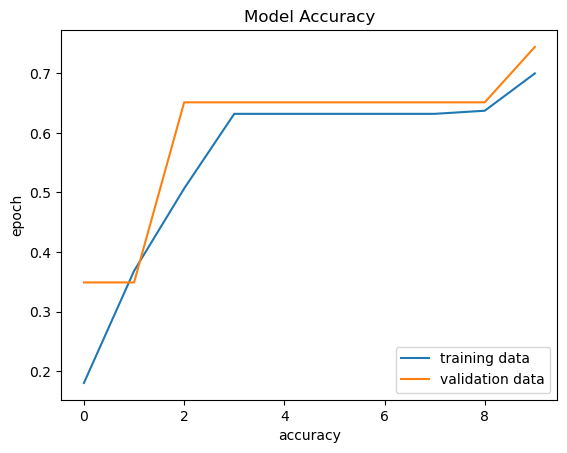

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title("Model Accuracy")
plt.xlabel('accuracy')
plt.ylabel('epoch')

plt.legend(['training data', 'validation data'],loc='lower right')

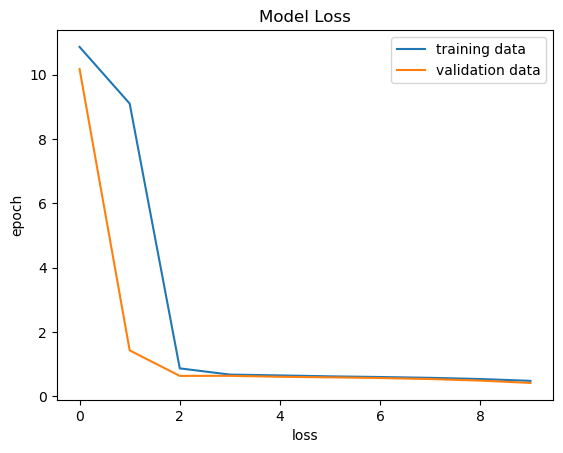

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title("Model Loss")
plt.xlabel('loss')
plt.ylabel('epoch')

plt.legend(['training data', 'validation data'],loc='upper right')

In [33]:
loss,accuracy= model.evaluate(xtest_std,Y_test)
accuracy

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7414 - loss: 0.4632


0.7202796936035156

In [34]:
print(xtest_std.shape)
print(xtest_std[0])

(143, 30)
[-0.09965933 -1.45130003 -0.11775407 -0.22153048  1.96978481 -0.18988628
  0.07437047  0.32610897  0.47064962  0.21572294  0.4199103   2.25542055
  0.5061588   0.0147873   1.01547251  0.34971967  0.36075824  2.25292511
 -0.41244145  0.48886594 -0.38671565 -1.63427548 -0.42144464 -0.44211862
  0.22413874 -0.74270314 -0.56688542 -0.25653077 -1.12693797 -0.65725578]


In [35]:
y_pred=model.predict(xtest_std)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [36]:
y_pred.shape

(143, 36)

In [37]:
y_pred[0]

array([ 0.20490238,  0.32707673, -0.09000546, -0.08450061, -0.13111365,
       -0.0968042 , -0.1808328 , -0.04555863, -0.04841799, -0.12111282,
       -0.11149913, -0.12720418, -0.05690908, -0.15448624, -0.07183713,
       -0.08900487, -0.21667594, -0.09454745, -0.12955278, -0.24721593,
       -0.07528633, -0.1338746 , -0.08668703, -0.17651111, -0.19266641,
       -0.05696666, -0.04301816, -0.02379417, -0.06482446, -0.09962678,
       -0.29782754, -0.04055709, -0.10967797, -0.07307118, -0.16798574,
       -0.21481264], dtype=float32)

In [38]:
xtest_std

array([[-0.09965933, -1.45130003, -0.11775407, ..., -0.25653077,
        -1.12693797, -0.65725578],
       [ 0.17732828, -0.0084733 ,  0.14704585, ...,  0.45151738,
         0.07226415,  0.04415693],
       [-1.25974862, -0.25178304, -1.270343  , ..., -1.39926669,
         0.21431427, -0.29935692],
       ...,
       [-0.87631087, -1.07660304, -0.90978954, ..., -1.12949139,
        -1.5127162 , -0.62273177],
       [-1.26002018, -0.15689224, -1.25339896, ..., -0.79279508,
         0.38926021,  0.07407773],
       [-0.23000644, -0.09363171, -0.2308457 , ...,  0.35890348,
         0.9036312 ,  0.15520914]])

In [39]:
y_pred

array([[ 0.20490238,  0.32707673, -0.09000546, ..., -0.07307118,
        -0.16798574, -0.21481264],
       [ 0.15810935,  0.37116367, -0.10690081, ..., -0.07999974,
        -0.15173596, -0.22790146],
       [-0.00657791,  0.19135223, -0.02671641, ..., -0.02043688,
        -0.03115135, -0.11503416],
       ...,
       [ 0.05332468,  0.22504507, -0.04256046, ..., -0.03421813,
        -0.07145905, -0.14159107],
       [ 0.09208377,  0.3085179 , -0.07914734, ..., -0.05786133,
        -0.10756141, -0.18795913],
       [ 0.0793141 ,  0.27968752, -0.06657666, ..., -0.04964495,
        -0.09565145, -0.17218506]], dtype=float32)

In [40]:
#argmax function

my_list=[0.2,0.56]
indexofmaxvalue=np.argmax(my_list)
indexofmaxvalue

1

In [41]:
# converting the prediction probability to class labels

y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]


**Building the predictive system**

In [42]:
input_data = (11.76, 21.6, 74.72, 427.9, 0.08637, 0.04966, 0.01657, 0.01115, 
               0.1495, 0.05888, 0.4062, 1.21, 2.635, 28.47, 0.005857, 
               0.009758, 0.01168, 0.007445, 0.02406, 0.001769, 12.98, 
               25.72, 82.98, 516.5, 0.1085, 0.08615, 0.05523, 0.03715, 
               0.2433, 0.06563)


# Standardizing the input data
input_data_std = scaler.transform( np.asarray(input_data).reshape(1,-1))

# Make prediction
prediction = model.predict(input_data_std)
print(prediction)

# Get the index of the class with the highest probability
prediction_label = np.argmax(prediction)
print(prediction_label)

# Interpret the prediction
if prediction_label == 0:
    print('The tumor is Malignant')
else:
    print('The tumor is Benign')


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
[[ 0.01851224  0.28052893 -0.06631279 -0.04090655 -0.03510833 -0.1108861
  -0.13141847 -0.04036248 -0.01673871 -0.02216178 -0.10824394 -0.08532137
  -0.06426686 -0.07780695 -0.0499106  -0.07704198 -0.14020735 -0.03394043
  -0.16883498 -0.18483281 -0.02988827 -0.10296506 -0.07248724 -0.04250646
  -0.12385577 -0.017039   -0.03260249 -0.02809596 -0.09109133 -0.07083243
  -0.19155914 -0.02047586 -0.02646649 -0.04334629 -0.06309509 -0.16246927]]
1
The tumor is Benign


In [43]:
input_data=X.loc[75]



# Standardizing the input data
input_data_std = scaler.transform( np.asarray(input_data).reshape(1,-1))

# Make prediction
prediction = model.predict(input_data_std)
print(prediction)

# Get the index of the class with the highest probability
prediction_label = np.argmax(prediction)
print(prediction_label)

# Interpret the prediction
if prediction_label == 0:
    print('The tumor is Malignant')
else:
    print('The tumor is Benign')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[ 0.20833516  0.3058036  -0.08150488 -0.08090097 -0.13466597 -0.09084356
  -0.16822642 -0.04150164 -0.04724467 -0.12560427 -0.10564715 -0.12266129
  -0.04867369 -0.14852077 -0.06957823 -0.07575262 -0.212426   -0.09358931
  -0.10924095 -0.2241509  -0.07188195 -0.12117624 -0.07736832 -0.17949718
  -0.18783206 -0.05495346 -0.03897876 -0.02112663 -0.0540753  -0.09736246
  -0.27956963 -0.04026735 -0.1137808  -0.0680393  -0.16643447 -0.20530647]]
1
The tumor is Benign


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
input_data=X.loc[410]



# Standardizing the input data
input_data_std = scaler.transform( np.asarray(input_data).reshape(1,-1))

# Make prediction
prediction = model.predict(input_data_std)
print(prediction)

# Get the index of the class with the highest probability
prediction_label = np.argmax(prediction)
print(prediction_label)

# Interpret the prediction
if prediction_label == 0:
    print('The tumor is Malignant')
else:
    print('The tumor is Benign')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[ 0.00991005  0.23800756 -0.04748863 -0.03126407 -0.03300369 -0.10044378
  -0.10337204 -0.03339565 -0.01144677 -0.02059335 -0.09712774 -0.07201624
  -0.0498811  -0.0585655  -0.04322857 -0.05374438 -0.12302727 -0.02654219
  -0.13687873 -0.13585138 -0.02104235 -0.07874024 -0.05682385 -0.03608793
  -0.10900867 -0.01074195 -0.0233441  -0.02170575 -0.07530469 -0.06443131
  -0.14513963 -0.01948971 -0.02754831 -0.03264904 -0.04991603 -0.14058459]]
1
The tumor is Benign


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


## **THANK YOU**